## Pager 2015-2021

### Raw Data

In [208]:
import pandas as pd

In [218]:
pager_raw_df = pd.read_csv("landing/2015-2021_offers_data.csv")

In [219]:
pager_raw_df["Deakin Bonus"] = pager_raw_df["Deakin Bonus"].fillna(-1)
pager_raw_df["Melbourne Access"] = pager_raw_df["Melbourne Access"].fillna(-1)

In [259]:
# preprocessing that will always be done
mask = (pager_raw_df["Residency"] == "Local") & \
        (pager_raw_df["Deakin Bonus"] == -1) & \
        (pager_raw_df["Melbourne Access"] == -1) & \
        (pager_raw_df["Offer type"] != "FFP") & \
        (pager_raw_df["Rural?"] == "No") #& \
        #((pager_raw_df["Postgrad"] == "No") | \
        # (pager_raw_df["Postgrad"].isna()))

pager_df = pager_raw_df[mask]
pager_df = pager_df[["University", "Offer type", "Postgrad", "GPA", "GAMSAT", "GPA/7 + GAMSAT/100"]]

In [260]:
pager_df.columns = ["uni", "offer type", "postgrad", "gpa", "gamsat", "combo score"]
pager_df.shape

(1714, 6)

### Removing outliers

In [261]:
print(pager_df["uni"].value_counts().sort_index())

uni
Australian National University        101
Deakin University                     145
Flinders University                    85
Griffith University                   155
Monash University                      39
University of Melbourne               306
University of New England               1
University of Newcastle                 1
University of Notre Dame Fremantle    117
University of Notre Dame Sydney        99
University of Queensland              199
University of Sydney                  324
University of Tasmania                  1
University of Western Australia        94
University of Wollongong               47
Name: count, dtype: int64


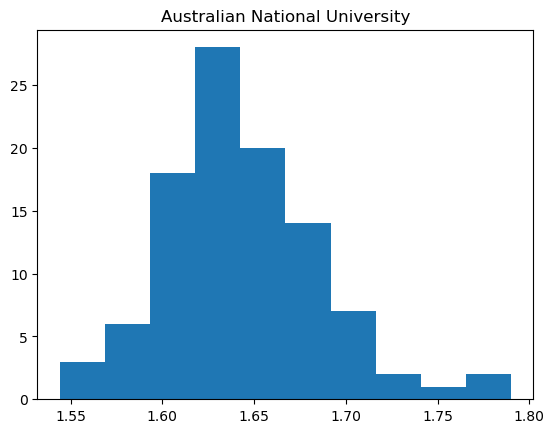

(1.539999999, 1.7457142870000002)


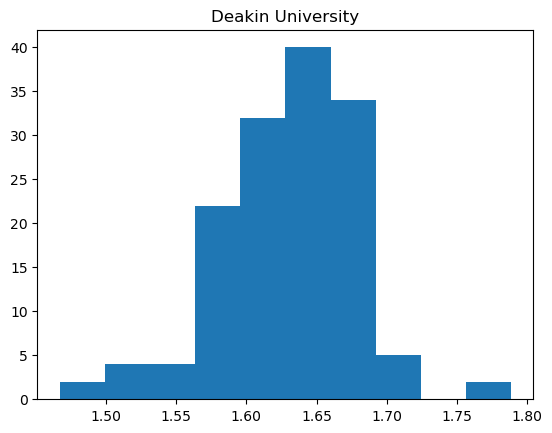

(1.5035714290000002, 1.760714285)


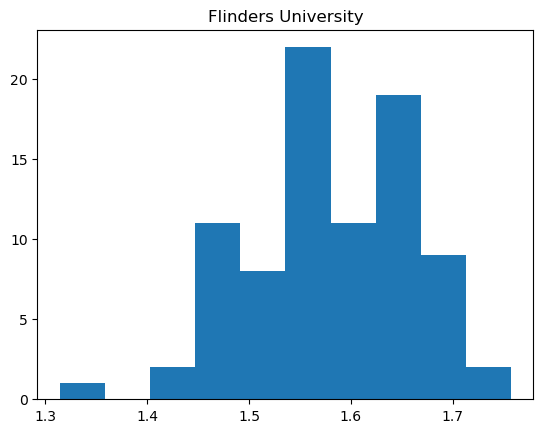

(1.3514285715, 1.8199999994999998)


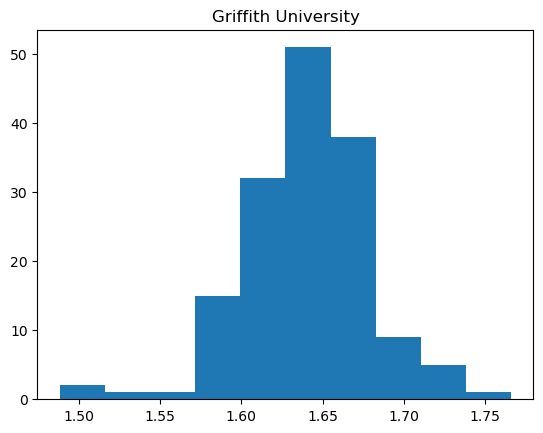

(1.5546428572500002, 1.72892857125)


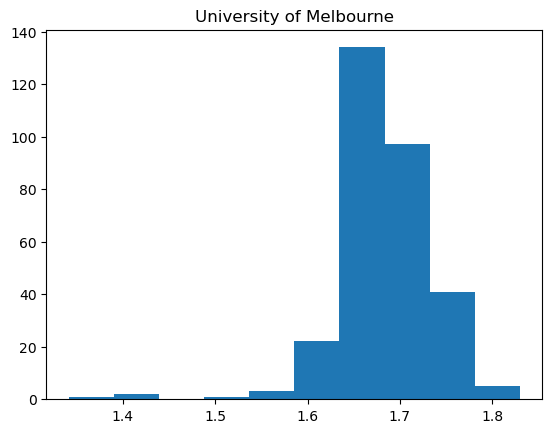

(1.5678571418750002, 1.7992857148749999)


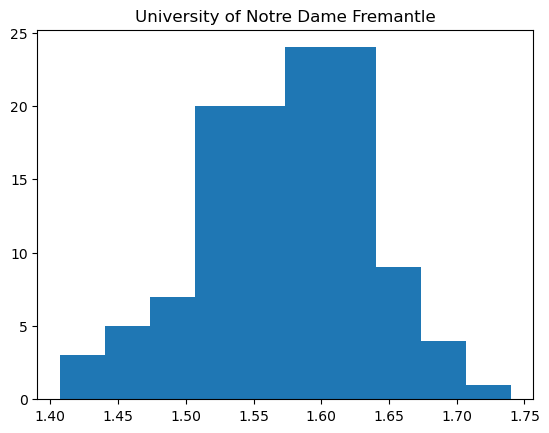

(1.4092857149999998, 1.7464285710000005)


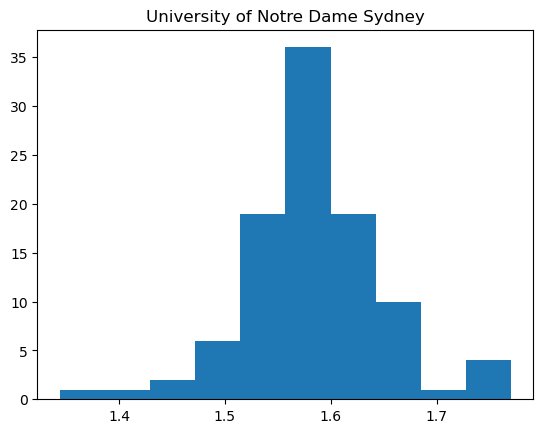

(1.4546428575000006, 1.7032142854999996)


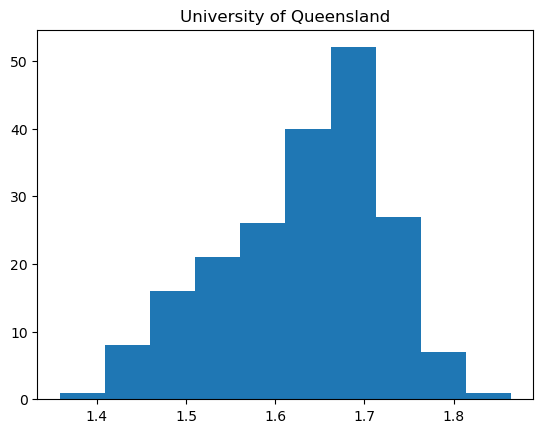

(1.3889285704999998, 1.8832142865000001)


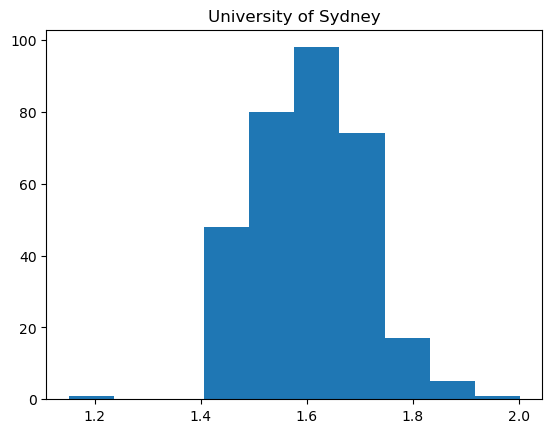

(1.314999999625, 1.892142856625)


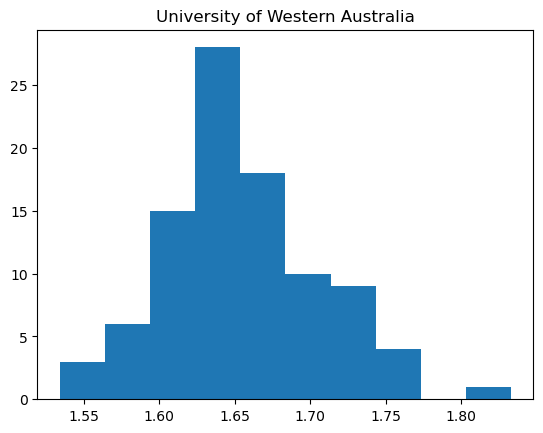

(1.53053571325, 1.77767857125)


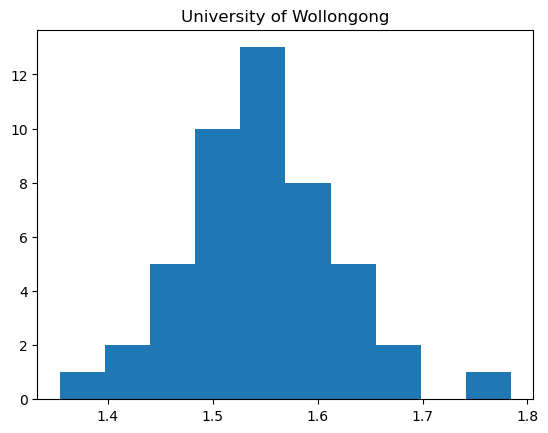

(1.3721428575, 1.7092857135)


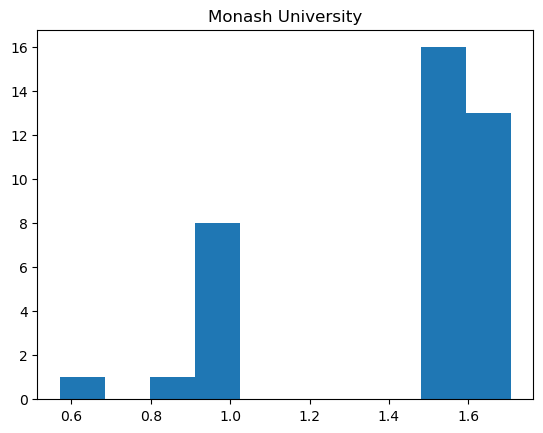

(0.6989285722500002, 2.15892857025)


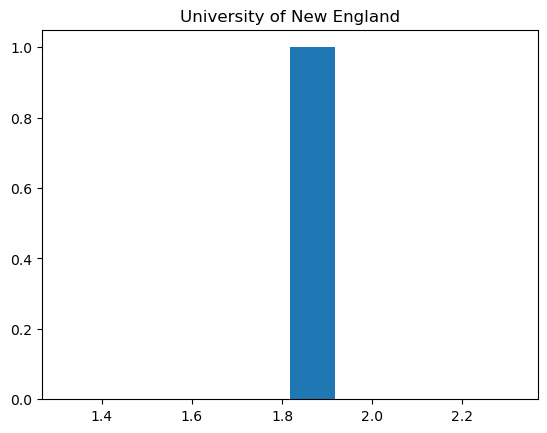

(1.817142857, 1.817142857)


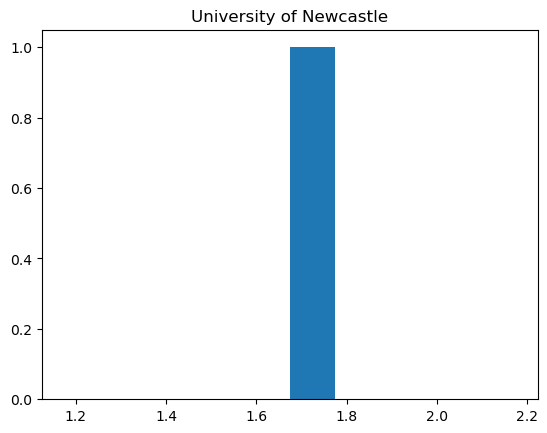

(1.674285714, 1.674285714)


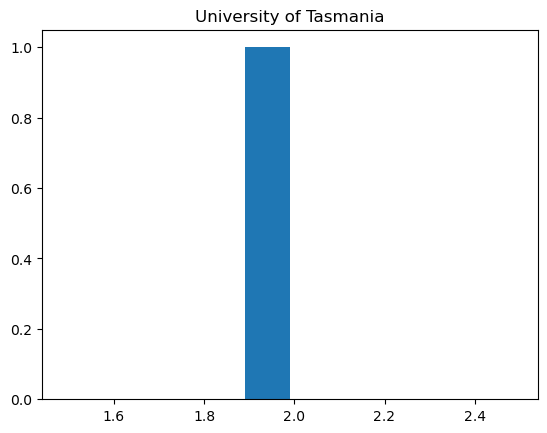

(1.99, 1.99)


In [262]:
import numpy as np
import matplotlib.pyplot as plt

unis = pager_df["uni"].unique()
indices_to_remove = []

for uni in unis:
    # find the current uni
    uni_pager_df = pager_df[pager_df["uni"] == uni]

    # combo scores
    uni_pager_combo_scores = uni_pager_df["combo score"]

    # find the outliers
    quartile_range = np.quantile(uni_pager_combo_scores, 0.75) - np.quantile(uni_pager_combo_scores, 0.25)
    lwr_bound = np.quantile(uni_pager_combo_scores, 0.25) - 1.5 * quartile_range
    upr_bound = np.quantile(uni_pager_combo_scores, 0.75) + 1.5 * quartile_range

    # find the indicies to keep
    outlier_mask = (uni_pager_combo_scores < lwr_bound) | (uni_pager_combo_scores > upr_bound)
    indices_to_remove.extend(list(uni_pager_combo_scores[outlier_mask].index))

    # map the combo score
    plt.hist(uni_pager_df["combo score"])
    plt.title(uni)
    plt.show()

    print(f"({lwr_bound}, {upr_bound})")

In [263]:
# drop the outliers
pager_df = pager_df.drop(indices_to_remove)
print(f"dropped {len(indicies_to_remove)} records out of {len(indicies_to_remove) + pager_df.shape[0]} records")

dropped 40 records out of 1714 records


In [265]:
pager_df.to_csv("preprocessed/pager_2015-2021.csv")

## Pager 2022

In [1]:
import pandas as pd
pager_raw_df = pd.read_csv("landing/2022_offers_data.csv")

In [305]:
new_column_names = ["_1", "_2", "uni offer", "prior qualification", "preference number", "first preference", "uni interview", 
                    "offer type", "gpa", "_3", "gamsat s1", "gamsat s2", "gamsat s3", "gamsat uni offer", "mcat", "score type",
                    "undergrad degree", "residency", "postgrad", "rural", "deakin bonus", "flinders applicant", "flinders program applicant",
                    "melbourne bonus", "_4"]

pager_raw_df.columns = new_column_names
pager_raw_df = pager_raw_df[[col for col in new_column_names if not "_" in col]]
pager_raw_df.shape

(432, 21)

In [323]:
situation_mask = ((pager_raw_df["offer type"] != "FFP") &
                  (pager_raw_df["score type"] == "GAMSAT") &
                  (pager_raw_df["residency"] == "Local") &
                  (pager_raw_df["rural"] == "No") &
                  (pager_raw_df["deakin bonus"] == 0) &
                  (pager_raw_df["melbourne bonus"] == "No"))

pager_df = pager_raw_df[situation_mask]
pager_df = pager_df.drop(columns = ["score type", "residency", "rural", "deakin bonus", "melbourne bonus"])

print(f"removed {situation_mask.sum()} records out of {pager_raw_df.shape[0]} records")

removed 177 records out of 432 records


In [371]:
mask = (pager_df["uni interview"] != "University of Melbourne") & \
       (pager_df["first preference"] == "University of Melbourne")

df = pager_df[mask]

In [372]:
print(df.shape[0])
df["uni offer"].value_counts()

21


uni offer
University of Notre Dame Sydney    5
University of Queensland           5
University of Sydney               2
Griffith University                2
Deakin University                  2
Australian National University     2
University of Western Australia    1
Flinders University                1
Monash University                  1
Name: count, dtype: int64

In [373]:
df["gamsat"] = df.apply(lambda x: (x["gamsat s1"] + x["gamsat s2"] + x["gamsat s3"]) / 3, axis=1)

C:\Users\mtp63\AppData\Local\Temp\ipykernel_16076\2201543591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gamsat"] = df.apply(lambda x: (x["gamsat s1"] + x["gamsat s2"] + x["gamsat s3"]) / 3, axis=1)


In [374]:
#df[df["gpa"] > 6.8].sort_values(by="gpa")

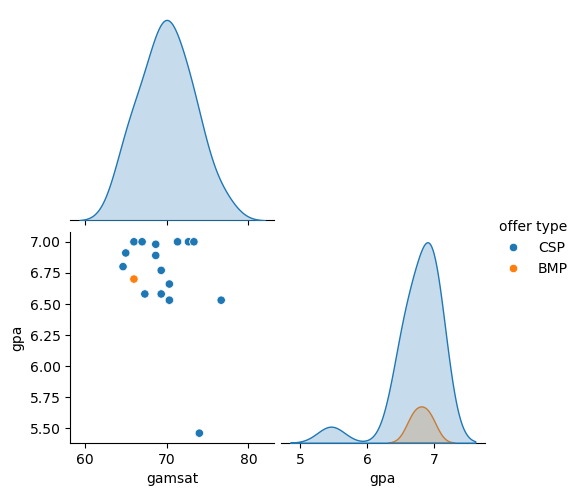

In [334]:
import seaborn

seaborn.pairplot(df, vars=["gamsat", "gpa"], corner=True, hue="offer type")

In [355]:
pager_df[(pager_df["uni offer"] == "University of Melbourne")]["uni interview"].value_counts()

uni interview
University of Melbourne           20
Australian National University     1
Name: count, dtype: int64

In [367]:
new_mask = ((pager_df["uni interview"] == "University of Melbourne"))

new_df = pager_df[new_mask]

In [368]:
new_df["gamsat"] = new_df.apply(lambda x: (x["gamsat s1"] + x["gamsat s2"] + x["gamsat s3"]) / 3, axis=1)

C:\Users\mtp63\AppData\Local\Temp\ipykernel_16076\3734186457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["gamsat"] = new_df.apply(lambda x: (x["gamsat s1"] + x["gamsat s2"] + x["gamsat s3"]) / 3, axis=1)


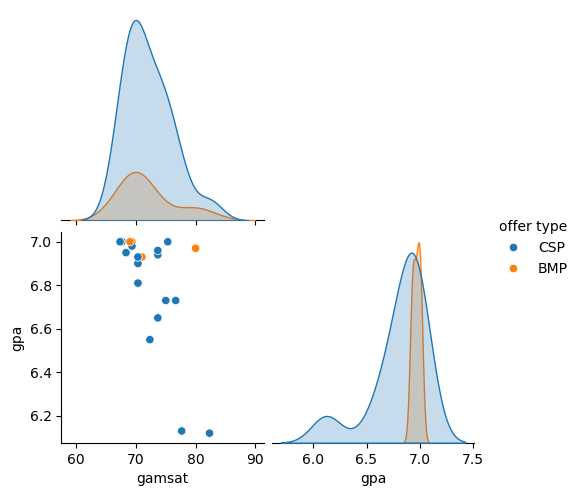

In [369]:
import seaborn

seaborn.pairplot(new_df, vars=["gamsat", "gpa"], corner=True, hue="offer type")

#### Combining

In [386]:
final_df = pd.concat([new_df, df], axis=0)
final_df["interview"] = (final_df["uni interview"] == "University of Melbourne")

In [390]:
weird_mask = ((final_df["interview"] == False) &
              (final_df["gamsat"] > 70) &
              (final_df["gpa"] > 6.8))

final_df[weird_mask]

,uni offer,prior qualification,preference number,first preference,uni interview,offer type,gpa,gamsat s1,gamsat s2,gamsat s3,gamsat uni offer,mcat,undergrad degree,postgrad,flinders applicant,flinders program applicant,gamsat,interview
164,University of Queensland,No,4,University of Melbourne,University of Queensland,CSP,7.0,73.0,68.0,73.0,71.0,NaN,BSc,Honours,Non-Flinders degree holder,No,71.333333,False
197,University of Queensland,No,4,University of Melbourne,University of Queensland,CSP,7.0,64.0,76.0,78.0,73.0,NaN,Physiotherapy,Masters (research),Non-Flinders degree holder,No,72.666667,False
234,Deakin University,No,2,University of Melbourne,Deakin University,CSP,7.0,65.0,64.0,91.0,78.0,NaN,BBiomed,NaN,Non-Flinders degree holder,No,73.333333,False
378,University of Queensland,No,3,University of Melbourne,University of Queensland,CSP,7.0,61.0,69.0,84.0,71.0,NaN,Bachelor of Biomedicine,Honours,Non-Flinders degree holder,No,71.333333,False
385,Flinders University,No,6,University of Melbourne,Flinders University,CSP,7.0,65.0,64.0,91.0,78.0,NaN,BBmed,NaN,Non-Flinders degree holder,No,73.333333,False


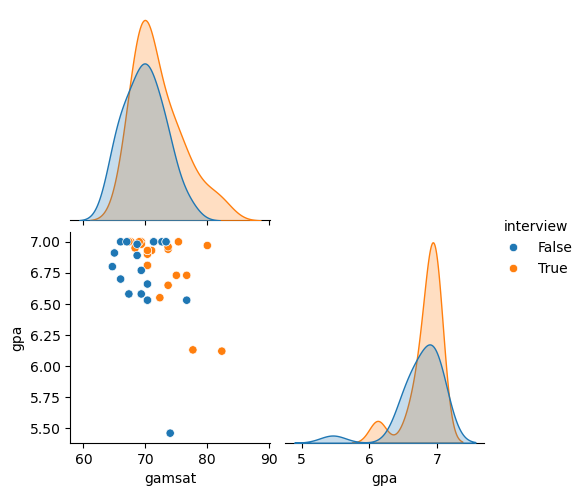

In [389]:
seaborn.pairplot(final_df, vars=["gamsat", "gpa"], corner=True, hue="interview")

## GEMSAS Offers

In [391]:
import pandas as pd

## GEMSAS Interviews